<center> <h1> Introduction to Data Science Phase 1 Project</h1></center>
<center> <h2> Group 6 </h2> </center>

<table>
<tr>
<th>Name
<th>ID
<th>Email
</tr>
<tr>
<td><h3>Goutham Reddy Kasireddy
<td><h3><b>2279917
<td><h3>gkasired@cougarnet.uh.edu
</tr>
<tr>
<td><h3>Suguna Chandana Sibbena
<td><h3><b>2311362
<td><h3>ssibbena@cougarnet.uh.edu
</tr>
<tr>
<td><h3>Prudhvi Kolla
<td><h3><b>2310127
<td><h3>pkolla@cougarnet.uh.edu
</tr><tr>
<td><h3>Naga Venkata Siva Tejaswini Anguluri
<td><h3><b>2202760
<td><h3>nangulur@cougarnet.uh.edu
</tr><tr>
<td><h3>Sameer Shaik
<td><h3><b>2295647
<td><h3>sshaik6@cougarnet.uh.edu
</tr>
</table>
    

##  Introduction

In a well-developed financial system, crisis management is on the downstream and risk prediction is on the
upstream. The primary goal of risk prediction is to limit harm and uncertainty by using financial information
such as business financial statements, customer transaction and repayment records, and so on to estimate
business performance or individual customers' credit risk.



Our task in this project is to accurately identify those who are likely to default. In this binary classification
task is performed with a labeled dataset, 'Default_Payment_Next_Month' is the target variable, indicating
whether a client defaulted (1) or did not default (0) on their payment in the upcoming month. The dataset is
likely to encompass a diverse range of features, such as limit_balance, payment history, education,
marriage, age, and other demographic factors, which are employed to build predictive models. These
models can be crucial for financial institutions in assessing and managing credit risk, allowing them to make
data-driven decisions, optimize lending practices, and reduce potential losses due to defaults. If this is the
case, the bank might be able to stop the loss by giving the client other choices (such forbearance or debt
consolidation, etc.) Hence, we build an automated model based on the information about the client and
historical transactions, capable of identifying key factors and predicting a credit card default.

In [1]:
#pip install --upgrade imbalanced-learn

In [2]:
#pip install --upgrade scikit-learn

In [3]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
#Reading data from csv file
df = pd.read_csv("Group_6_Raw_Data.csv")

##  Data Cleaning

In [5]:
#printing the column names
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
#Renaming the column names
df.columns=['Limit_Balance', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6', 'Default_Payment_Next_Month']

Description of Columns:
* Limit_Balance: Amount of the given credit in dollars

*   Sex: Gender, categorical variable (1=male, 2=female)
*   Education: Level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   Marriage: Marital status, categorical variable (1=married, 2=single, 3=others)
* Age: Age (in years)
*   Pay_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   Pay_2: Repayment status in August, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   Pay_3: Repayment status in July, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   Pay_4: Repayment status in June, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   Pay_5: Repayment status in May, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   Pay_6: Repayment status in April, 2005 (scale same as above)
*   Bill_Amount1: Amount of bill statement in September, 2005 (in dollar)
*   Bill_Amount2: Amount of bill statement in August, 2005 (in dollar)
*   Bill_Amount3: Amount of bill statement in July, 2005 (in dollar)
*   Bill_Amount4: Amount of bill statement in June, 2005 (in dollar)
*   Bill_Amount5: Amount of bill statement in May, 2005 (in dollar)
*   Bill_Amount6: Amount of bill statement in April, 2005 (in dollar)
*   Pay_Amount1: Amount of previous payment in September, 2005 (in dollar)
*   Pay_Amount2: Amount of previous payment in August, 2005 (in dollar)
*   Pay_Amount3: Amount of previous payment in July, 2005 (in dollar)
*   Pay_Amount4: Amount of previous payment in June, 2005 (in dollar)
*   Pay_Amount5: Amount of previous payment in May, 2005 (in dollar)
*   Pay_Amount6: Amount of previous payment in April, 2005 (in dollar)
* Default_Payment_Next_Month: Default Payment (Yes=1, No=0)


In [9]:
df.head()

Limit_Balance  Sex  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  Pay_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   

   Pay_5  ...  Bill_Amount4  Bill_Amount5  Bill_Amount6  Pay_Amount1  \
0     -2  ...             0             0             0            0   
1      0  ...          3272          3455          3261            0   
2      0  ...         14331         14948         15549         1518   
3      0  ...         28314         28959         29547         2000   
4      0  ...         20940         19146         19131         2000   

   Pay_Amount2  Pay_Amount3  Pay_Amount4  Pay_Amount5  Pay_Amount6  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   Default_Payment_Next_Month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 24 columns]

In [10]:
df['Sex'].value_counts()

2    18112
1    11888
Name: Sex, dtype: int64

In [11]:
df['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [12]:
df['Marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marriage, dtype: int64

The attributes Limit_Balance, Sex, and Age are consistent with the description while Education and Marriage have some irregular entries. 
Since irregular entries are relatively few (1.33%) of the total number, deleting the records that contain the irregular entries. 

In [13]:
#Shape of the dataframe
df.shape

(30000, 24)

In [14]:
#since irregular entries are relatively few (399), deleting them.
df = df.drop(df[df['Education']==0].index)
df = df.drop(df[df['Education']==5].index)
df = df.drop(df[df['Education']==6].index)
df = df.drop(df[df['Marriage']==0].index)

In [15]:
#shape of the dataframe after removing irregular entries
df.shape

(29601, 24)

Using describe method we printed the description of the history of past payments features. The columns PAY_n range from -2  to 8, hence they need to be rescaled to match the official description.

In [16]:
df[['Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']].describe()

Pay_1         Pay_2         Pay_3         Pay_4         Pay_5  \
count  29601.000000  29601.000000  29601.000000  29601.000000  29601.000000   
mean      -0.014932     -0.131313     -0.163440     -0.218303     -0.263978   
std        1.124503      1.199642      1.199793      1.172220      1.136217   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              Pay_6  
count  29601.000000  
mean      -0.287558  
std        1.152206  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [17]:
#rescaling the history of past payment features to match official description
pay_features = ['Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

In [18]:
#Checking for missing values
df.isnull().sum()

Limit_Balance                 0
Sex                           0
Education                     0
Marriage                      0
Age                           0
Pay_1                         0
Pay_2                         0
Pay_3                         0
Pay_4                         0
Pay_5                         0
Pay_6                         0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Bill_Amount4                  0
Bill_Amount5                  0
Bill_Amount6                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Pay_Amount4                   0
Pay_Amount5                   0
Pay_Amount6                   0
Default_Payment_Next_Month    0
dtype: int64

No missing values in the dataset

In [19]:
#Checking for duplicate values
dup_rows = df.duplicated()
dup_rows.sum()

36

Number of duplicate rows in the dataset are 36

In [20]:
#Dropping duplicate rows
df = df.drop_duplicates()

In [21]:
df

Limit_Balance  Sex  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  \
0              20000    2          2         1   24      3      3     -1   
1             120000    2          2         2   26     -1      3      1   
2              90000    2          2         2   34      1      1      1   
3              50000    2          2         1   37      1      1      1   
4              50000    1          2         1   57     -1      1     -1   
...              ...  ...        ...       ...  ...    ...    ...    ...   
29995         220000    1          3         1   39      1      1      1   
29996         150000    1          3         2   43     -1     -1     -1   
29997          30000    1          2         2   37      5      4      3   
29998          80000    1          3         1   41      2     -1      1   
29999          50000    1          2         1   46      1      1      1   

       Pay_4  Pay_5  ...  Bill_Amount4  Bill_Amount5  Bill_Amount6  \
0         -1     -1  ...             0             0             0   
1          1      1  ...          3272          3455          3261   
2          1      1  ...         14331         14948         15549   
3          1      1  ...         28314         28959         29547   
4          1      1  ...         20940         19146         19131   
...      ...    ...  ...           ...           ...           ...   
29995      1      1  ...         88004         31237         15980   
29996     -1      1  ...          8979          5190             0   
29997     -1      1  ...         20878         20582         19357   
29998      1      1  ...         52774         11855         48944   
29999      1      1  ...         36535         32428         15313   

       Pay_Amount1  Pay_Amount2  Pay_Amount3  Pay_Amount4  Pay_Amount5  \
0                0          689            0            0            0   
1                0         1000         1000         1000            0   
2             1518         1500         1000         1000         1000   
3             2000         2019         1200         1100         1069   
4             2000        36681        10000         9000          689   
...            ...          ...          ...          ...          ...   
29995         8500        20000         5003         3047         5000   
29996         1837         3526         8998          129            0   
29997            0            0        22000         4200         2000   
29998        85900         3409         1178         1926        52964   
29999         2078         1800         1430         1000         1000   

       Pay_Amount6  Default_Payment_Next_Month  
0                0                           1  
1             2000                           1  
2             5000                           0  
3             1000                           0  
4              679                           0  
...            ...                         ...  
29995         1000                           0  
29996            0                           0  
29997         3100                           1  
29998         1804                           1  
29999         1000                           1  

[29565 rows x 24 columns]

After dropping the duplicate records the shape of dataframe is changed from 29601 to 29565

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29565 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Limit_Balance               29565 non-null  int64
 1   Sex                         29565 non-null  int64
 2   Education                   29565 non-null  int64
 3   Marriage                    29565 non-null  int64
 4   Age                         29565 non-null  int64
 5   Pay_1                       29565 non-null  int64
 6   Pay_2                       29565 non-null  int64
 7   Pay_3                       29565 non-null  int64
 8   Pay_4                       29565 non-null  int64
 9   Pay_5                       29565 non-null  int64
 10  Pay_6                       29565 non-null  int64
 11  Bill_Amount1                29565 non-null  int64
 12  Bill_Amount2                29565 non-null  int64
 13  Bill_Amount3                29565 non-null  int64
 14  Bill_A

## Data Exploration

In [23]:
df['Default_Payment_Next_Month'].value_counts()

0    22966
1     6599
Name: Default_Payment_Next_Month, dtype: int64

We can observe that the dataset we are dealing contains unbalanced data. If we do not handle the unbalanced data, classification models will tend to focus on the majority class and overlook the minority class

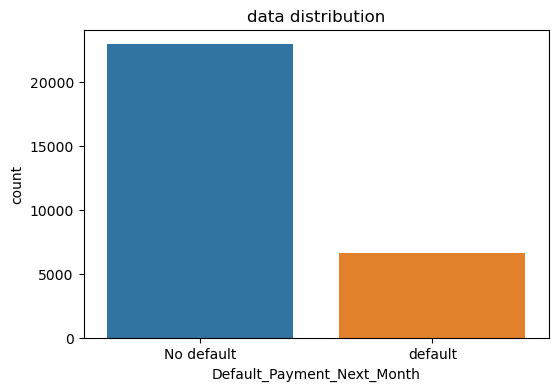

In [24]:
#Bargraph demostarting count vs target variable
import seaborn as sns
plt.figure(figsize=(6,4))
plt.title('data distribution')
ax = sns.countplot(x='Default_Payment_Next_Month',data=df)
ax.set_xticklabels(['No default','default'])
plt.show()

### Outlier Detection

<Axes: >

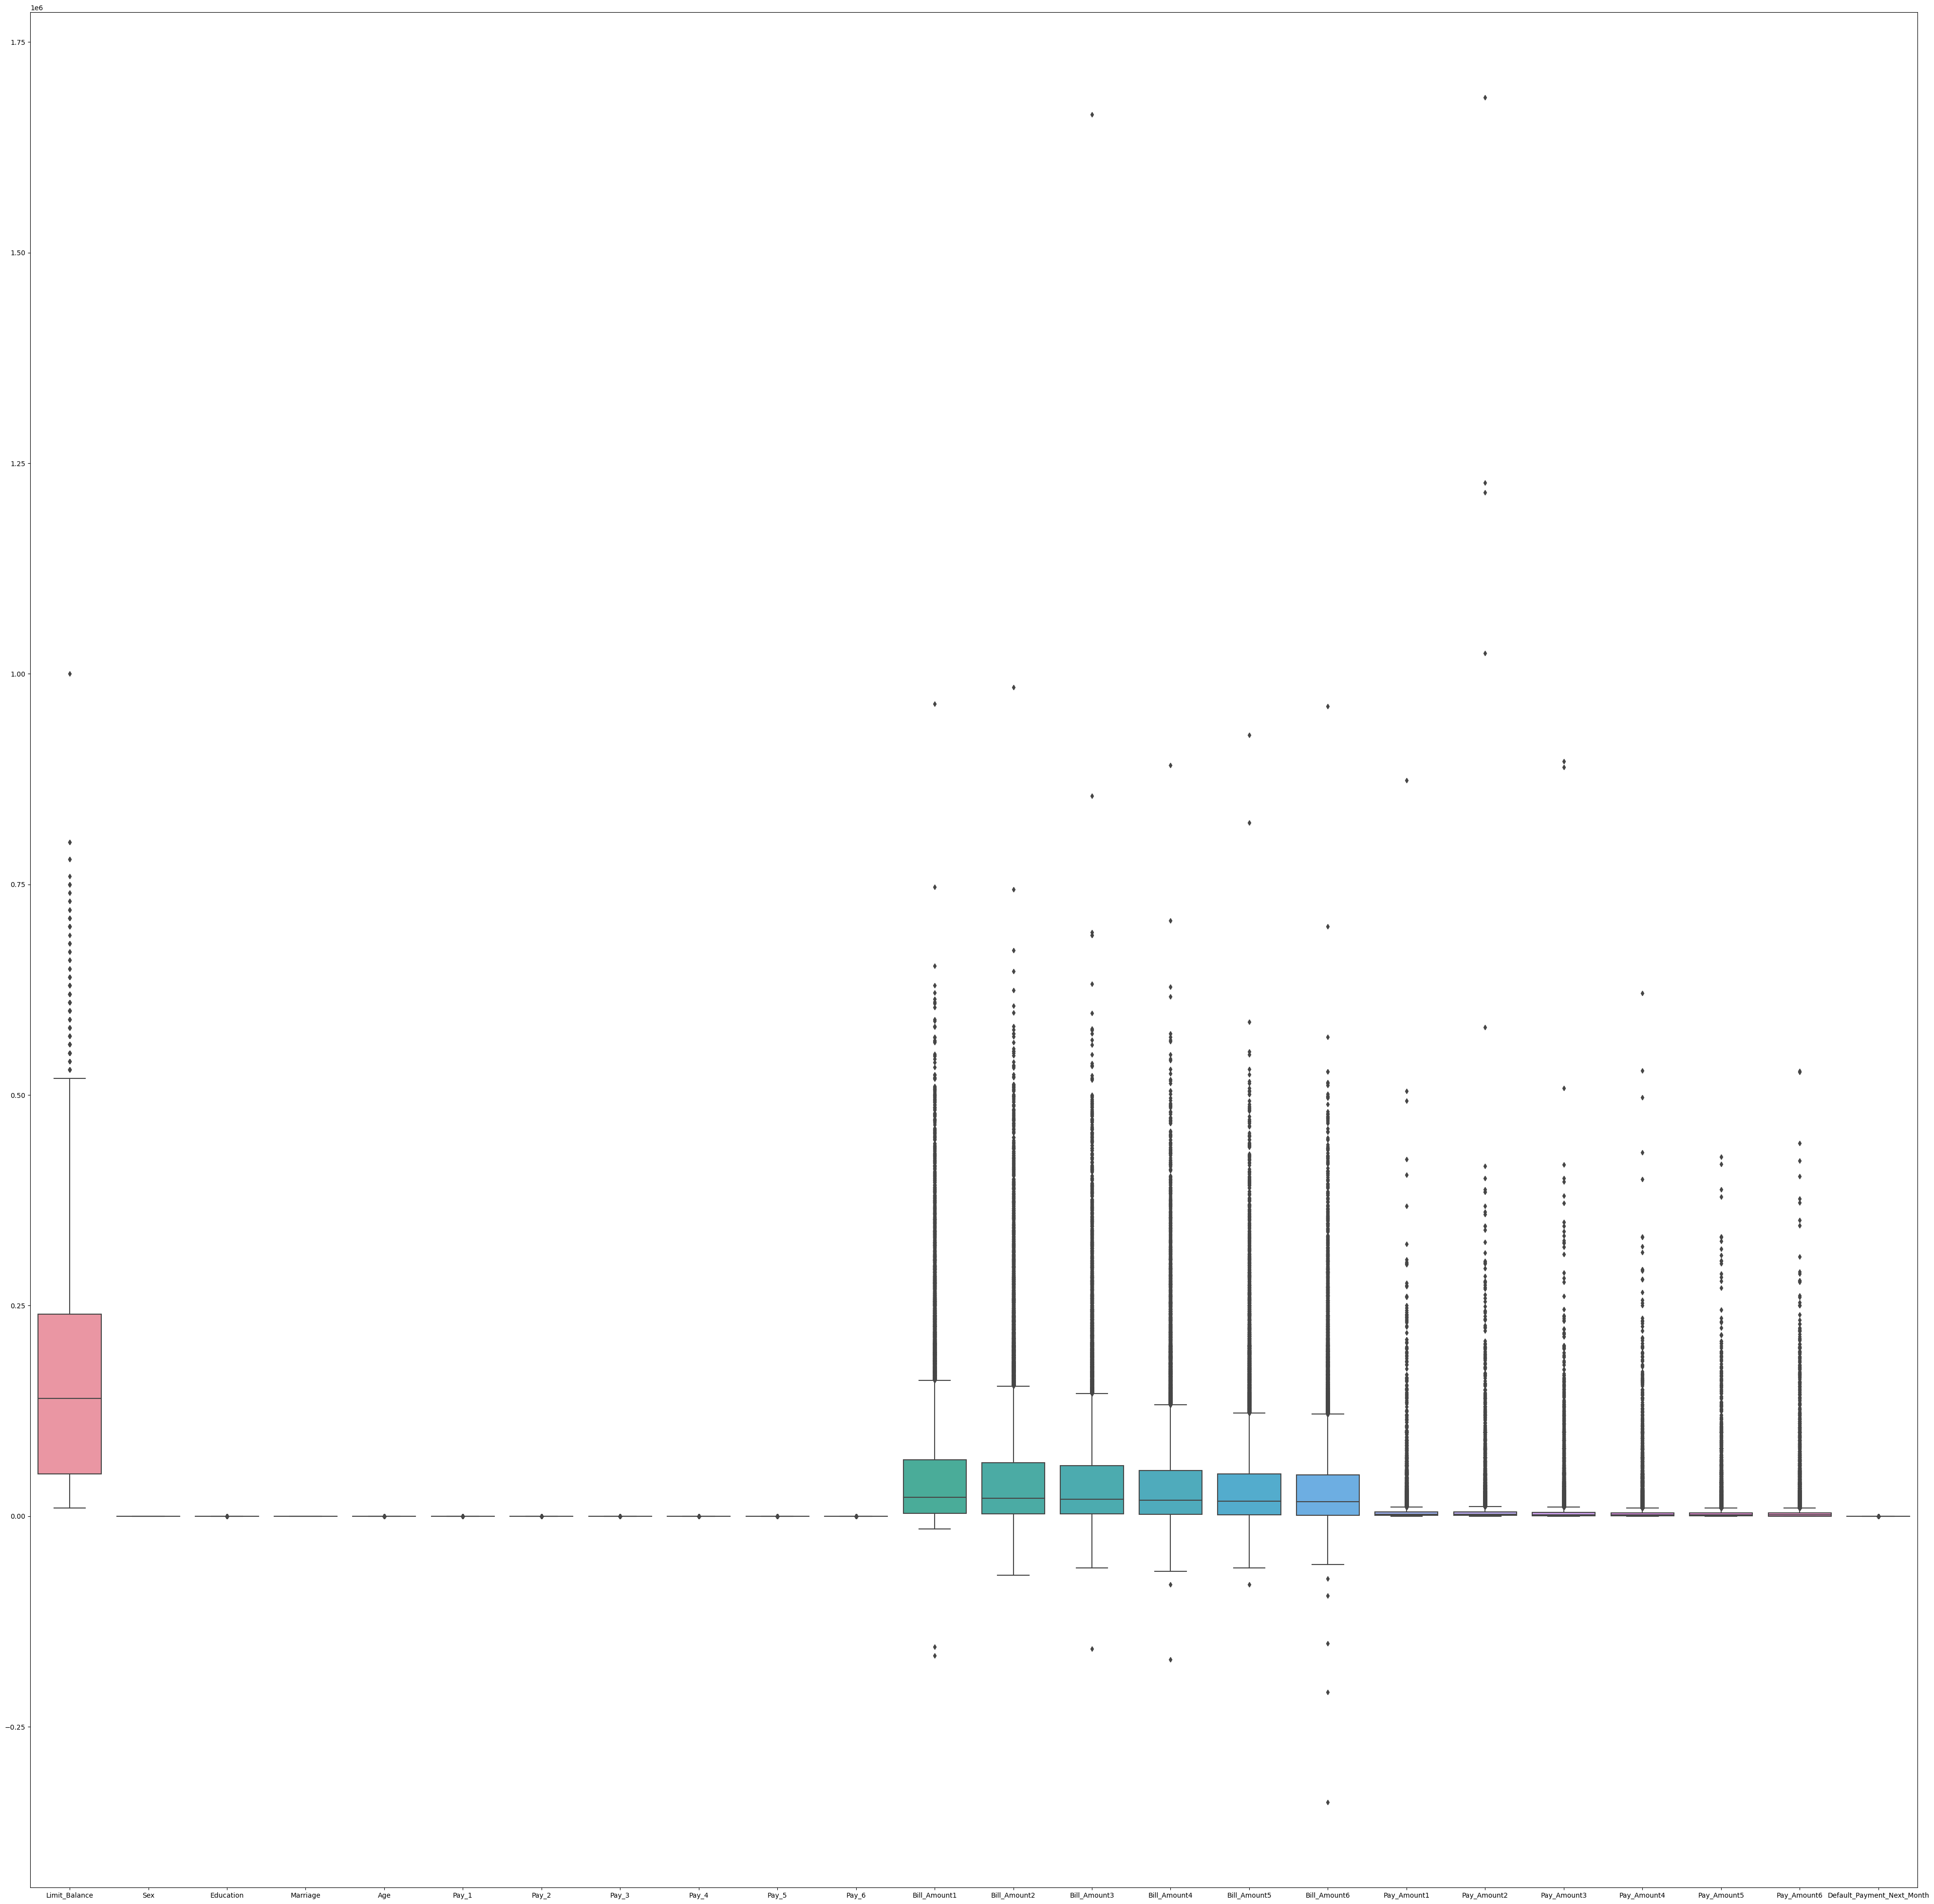

In [25]:
#Checking for the outliers using boxplot
import seaborn as sns
plt.figure(figsize=(50,50))
sns.boxplot(df)

In [26]:
#Reducing the effect of outliers using winsoriszation
from scipy.stats.mstats import winsorize
data_array = df.to_numpy()
winsorized_data = winsorize(data_array, limits=[0.05, 0.05])

In [27]:
winsorized_data

masked_array(
  data=[[ 20000,      2,      2, ...,      0,      0,      1],
        [120000,      2,      2, ...,      0,   2000,      1],
        [ 90000,      2,      2, ...,   1000,   5000,      0],
        ...,
        [ 30000,      1,      2, ...,   2000,   3100,      1],
        [ 80000,      1,      3, ...,  52964,   1804,      1],
        [ 50000,      1,      2, ...,   1000,   1000,      1]],
  mask=False,
  fill_value=999999)

Handled outlier data using winsorization technique stored in the variable df1

In [28]:
df1 = pd.DataFrame(winsorized_data, columns = ['Limit_Balance', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6', 'Default_Payment_Next_Month'])


In [29]:
df1

Limit_Balance  Sex  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  \
0              20000    2          2         1   24      3      3     -1   
1             120000    2          2         2   26     -1      3      1   
2              90000    2          2         2   34      1      1      1   
3              50000    2          2         1   37      1      1      1   
4              50000    1          2         1   57     -1      1     -1   
...              ...  ...        ...       ...  ...    ...    ...    ...   
29560         121931    1          3         1   39      1      1      1   
29561         121931    1          3         2   43     -1     -1     -1   
29562          30000    1          2         2   37      5      4      3   
29563          80000    1          3         1   41      2     -1      1   
29564          50000    1          2         1   46      1      1      1   

       Pay_4  Pay_5  ...  Bill_Amount4  Bill_Amount5  Bill_Amount6  \
0         -1     -1  ...             0             0             0   
1          1      1  ...          3272          3455          3261   
2          1      1  ...         14331         14948         15549   
3          1      1  ...         28314         28959         29547   
4          1      1  ...         20940         19146         19131   
...      ...    ...  ...           ...           ...           ...   
29560      1      1  ...         88004         31237         15980   
29561     -1      1  ...          8979          5190             0   
29562     -1      1  ...         20878         20582         19357   
29563      1      1  ...         52774         11855         48944   
29564      1      1  ...         36535         32428         15313   

       Pay_Amount1  Pay_Amount2  Pay_Amount3  Pay_Amount4  Pay_Amount5  \
0                0          689            0            0            0   
1                0         1000         1000         1000            0   
2             1518         1500         1000         1000         1000   
3             2000         2019         1200         1100         1069   
4             2000        36681        10000         9000          689   
...            ...          ...          ...          ...          ...   
29560         8500        20000         5003         3047         5000   
29561         1837         3526         8998          129            0   
29562            0            0        22000         4200         2000   
29563        85900         3409         1178         1926        52964   
29564         2078         1800         1430         1000         1000   

       Pay_Amount6  Default_Payment_Next_Month  
0                0                           1  
1             2000                           1  
2             5000                           0  
3             1000                           0  
4              679                           0  
...            ...                         ...  
29560         1000                           0  
29561            0                           0  
29562         3100                           1  
29563         1804                           1  
29564         1000                           1  

[29565 rows x 24 columns]

In [30]:
df1.describe()

Limit_Balance           Sex     Education      Marriage           Age  \
count   29565.000000  29565.000000  29565.000000  29565.000000  29565.000000   
mean    92780.088382      1.603179      1.815897      1.555488     35.466227   
std     37899.088736      0.489246      0.710374      0.518114      9.214810   
min     10000.000000      1.000000      1.000000      1.000000     21.000000   
25%     50000.000000      1.000000      1.000000      1.000000     28.000000   
50%    121931.000000      2.000000      2.000000      2.000000     34.000000   
75%    121931.000000      2.000000      2.000000      2.000000     41.000000   
max    121931.000000      2.000000      4.000000      3.000000     79.000000   

              Pay_1         Pay_2         Pay_3         Pay_4         Pay_5  \
count  29565.000000  29565.000000  29565.000000  29565.000000  29565.000000   
mean       0.794690      0.668223      0.640284      0.593675      0.552579   
std        1.339023      1.396797      1.388622      1.350218      1.308795   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        9.000000      9.000000      9.000000      9.000000      9.000000   

       ...   Bill_Amount4   Bill_Amount5   Bill_Amount6    Pay_Amount1  \
count  ...   29565.000000   29565.000000   29565.000000   29565.000000   
mean   ...   35503.127583   33693.488145   32754.753256    5354.238086   
std    ...   40404.161842   39627.895089   39431.654730   12011.037758   
min    ...      -1.000000      -1.000000      -1.000000       0.000000   
25%    ...    2360.000000    1805.000000    1299.000000    1000.000000   
50%    ...   19037.000000   18121.000000   17156.000000    2100.000000   
75%    ...   54340.000000   50140.000000   49206.000000    5006.000000   
max    ...  121931.000000  121931.000000  121931.000000  121931.000000   

         Pay_Amount2    Pay_Amount3    Pay_Amount4    Pay_Amount5  \
count   29565.000000   29565.000000   29565.000000   29565.000000   
mean     5380.309521    4877.052393    4576.057433    4553.557314   
std     12762.589305   12230.227461   11894.752329   11851.648042   
min         0.000000       0.000000       0.000000       0.000000   
25%       836.000000     390.000000     300.000000     264.000000   
50%      2009.000000    1800.000000    1500.000000    1500.000000   
75%      5000.000000    4500.000000    4019.000000    4058.000000   
max    121931.000000  121931.000000  121931.000000  121931.000000   

         Pay_Amount6  Default_Payment_Next_Month  
count   29565.000000                29565.000000  
mean     4817.421715                    0.223203  
std     13155.250145                    0.416400  
min         0.000000                    0.000000  
25%       150.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    121931.000000                    1.000000  

[8 rows x 24 columns]

In [31]:
df1[[ 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6']].describe()



Bill_Amount1   Bill_Amount2   Bill_Amount3   Bill_Amount4  \
count   29565.000000   29565.000000   29565.000000   29565.000000   
mean    40097.733198   39011.454422   37694.338238   35503.127583   
std     42594.962376   42126.033571   41481.996622   40404.161842   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%      3580.000000    3000.000000    2696.000000    2360.000000   
50%     22331.000000   21127.000000   20076.000000   19037.000000   
75%     66738.000000   63668.000000   59863.000000   54340.000000   
max    121931.000000  121931.000000  121931.000000  121931.000000   

        Bill_Amount5   Bill_Amount6  
count   29565.000000   29565.000000  
mean    33693.488145   32754.753256  
std     39627.895089   39431.654730  
min        -1.000000      -1.000000  
25%      1805.000000    1299.000000  
50%     18121.000000   17156.000000  
75%     50140.000000   49206.000000  
max    121931.000000  121931.000000

In [32]:
df1[['Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']].describe()

Pay_Amount1    Pay_Amount2    Pay_Amount3    Pay_Amount4  \
count   29565.000000   29565.000000   29565.000000   29565.000000   
mean     5354.238086    5380.309521    4877.052393    4576.057433   
std     12011.037758   12762.589305   12230.227461   11894.752329   
min         0.000000       0.000000       0.000000       0.000000   
25%      1000.000000     836.000000     390.000000     300.000000   
50%      2100.000000    2009.000000    1800.000000    1500.000000   
75%      5006.000000    5000.000000    4500.000000    4019.000000   
max    121931.000000  121931.000000  121931.000000  121931.000000   

         Pay_Amount5    Pay_Amount6  
count   29565.000000   29565.000000  
mean     4553.557314    4817.421715  
std     11851.648042   13155.250145  
min         0.000000       0.000000  
25%       264.000000     150.000000  
50%      1500.000000    1500.000000  
75%      4058.000000    4000.000000  
max    121931.000000  121931.000000

<Axes: >

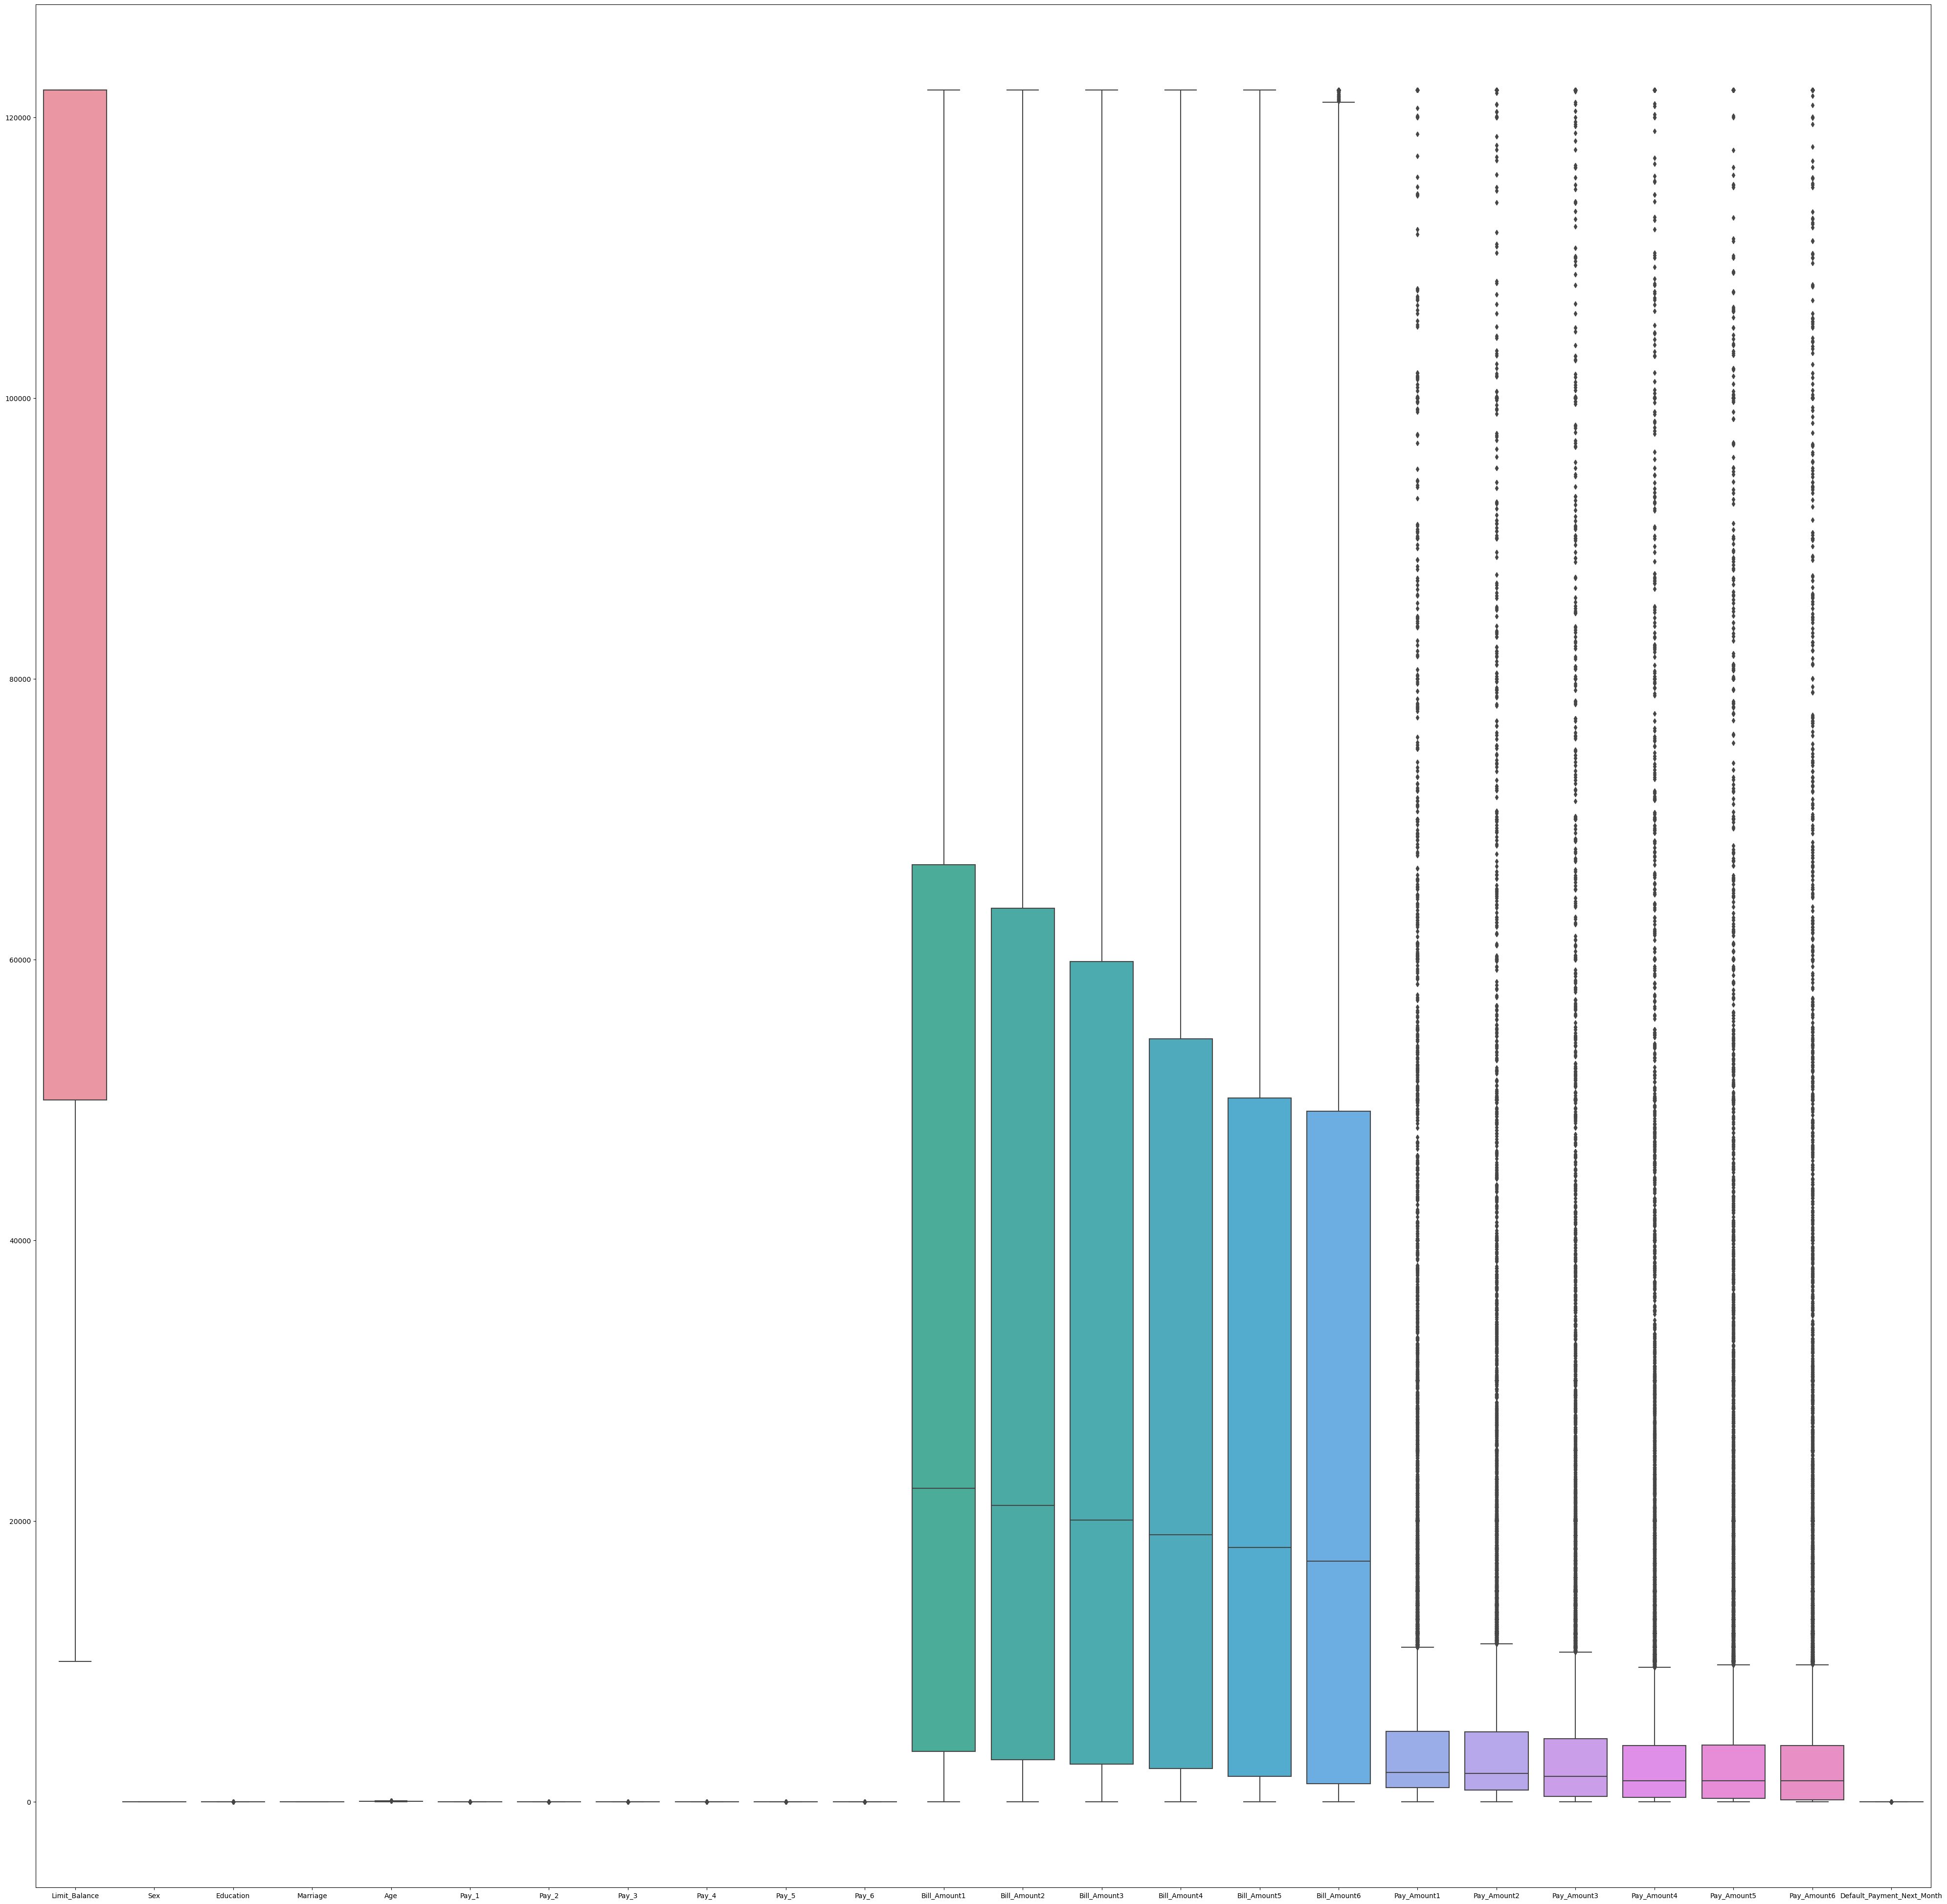

In [33]:
#boxplot for the data that is handled using winsorization and stored as df1
plt.figure(figsize=(50,50))
sns.boxplot(df1)

### Boxplots for each column

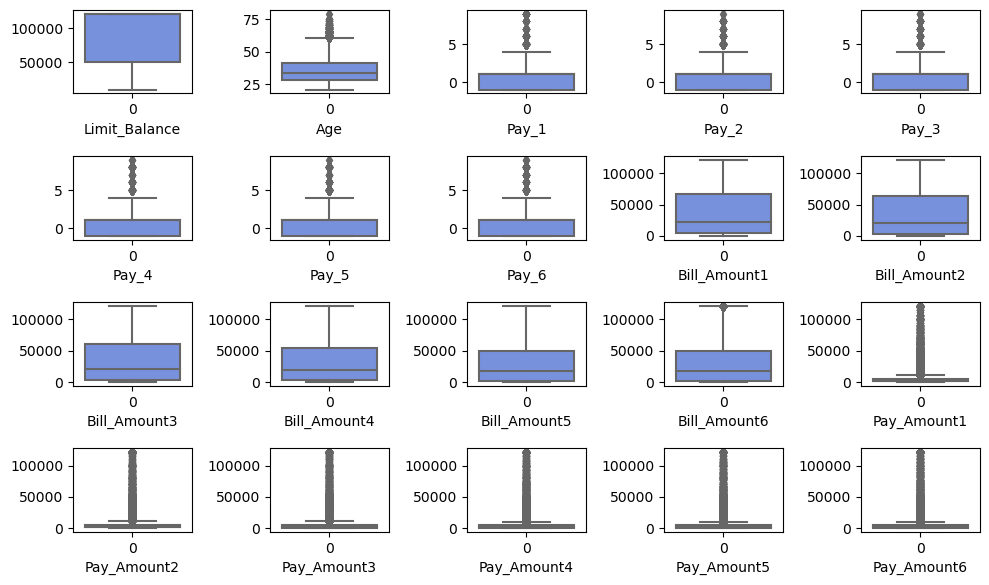

In [34]:
num_columns =['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']
fig, axs = plt.subplots(4, 5, figsize=(10,6))
fig.subplots_adjust(hspace=20,wspace=5)
for i, column in enumerate(num_columns):
    row, col = divmod(i, 5)
    ax = axs[row, col]
    ax.set_xlabel(column)
    sns.set_palette("coolwarm")
    sns.boxplot(df1[column],ax=ax)
    i=i+1
plt.tight_layout()
plt.show()

In the sex variable, Male entries are represented using 1 and Female with 2

In [35]:
df1.groupby('Sex')[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6']].agg(['mean', 'std','sum'])

Bill_Amount1                           Bill_Amount2                \
             mean           std        sum          mean           std   
Sex                                                                      
1    41600.029151  42867.182244  488051542  40407.299778  42339.768194   
2    39109.400550  42387.097393  697437940  38093.153648  41960.701356   

                Bill_Amount3                           Bill_Amount4  \
           sum          mean           std        sum          mean   
Sex                                                                   
1    474058441  38792.995994  41723.363260  455119429  36282.716331   
2    679315209  36971.551674  41307.676116  659313681  34990.250603   

                              Bill_Amount5                           \
              std        sum          mean           std        sum   
Sex                                                                   
1    40662.899956  425668828  34248.886209  39953.211338  401807933   
2    40225.939111  623981139  33328.102058  39409.266160  594340044   

     Bill_Amount6                           
             mean           std        sum  
Sex                                         
1    33218.585152  39762.769122  389720441  
2    32449.606852  39210.421941  578673839

On average, Males have higher billing amounts compared to females

In [36]:
df1.groupby('Sex')[['Pay_Amount1','Pay_Amount2','Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']].agg(['mean', 'std','sum'])

Pay_Amount1                          Pay_Amount2                          \
            mean           std       sum         mean           std       sum   
Sex                                                                             
1    5376.593931  11991.513957  63078200  5528.163655  13555.834755  64856416   
2    5339.530589  12024.178193  95219849  5283.039029  12212.076171  94212435   

     Pay_Amount3                          Pay_Amount4                          \
            mean           std       sum         mean           std       sum   
Sex                                                                             
1    4993.244289  13068.243624  58580742  4553.776253  12078.425707  53424903   
2    4800.611899  11645.818947  85609312  4590.715808  11772.671910  81866235   

     Pay_Amount5                          Pay_Amount6                          
            mean           std       sum         mean           std       sum  
Sex                                                                            
1    4596.360297  12493.778991  53924499  4785.733123  13561.873336  56146221  
2    4525.398026  11409.781351  80701423  4838.269052  12881.084221  86280852

On average, males make higher payments compared to females in the months of September, August, July, May.

In [37]:
g_data = df1.groupby(['Marriage','Sex'])[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6']].agg(['mean', 'std','sum'])
g_data

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   
         2    39486.036691  42893.614104  329313546  38383.971223   
2        1    40680.317649  41470.586278  263689819  39660.544276   
         2    38843.656099  42026.226837  361440220  37917.996668   
3        1    36474.407692  35737.096855    4741673  34281.861538   
         2    35554.117021  37184.474471    6684174  33861.329787   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   
         2    42416.735118  320122320  37044.169305  41613.904370  308948372   
2        1    41006.779147  257079648  37651.063715  40225.212689  244054195   
         2    41647.258511  352826959  37040.300699  41159.265773  344659998   
3        1    34662.034327    4456642  33525.238462  32561.148210    4358281   
         2    36663.108107    6365930  30347.398936  34008.294320    5705311   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   
         2    35019.040647  40580.337734  292058799  33342.105156   
2        1    35263.700401  39180.637938  228579306  33046.412527   
         2    35133.213756  40045.291104  326914554  33492.024718   
3        1    29295.476923  31574.534779    3808412  26959.230769   
         2    26637.159574  31759.270768    5007786  24593.601064   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010  
         2    39761.910105  278073157  32277.587770  39422.383171  269195082  
2        1    38341.673803  214206846  31993.618945  38125.533071  207382638  
         2    39249.509960  311643290  32762.358839  39157.132358  304853749  
3        1    31908.876574    3504700  26336.869231  32362.595949    3423793  
         2    29527.224582    4623597  24601.106383  30827.273539    4625008

In [38]:
max_Bill_Amount1 = g_data[('Bill_Amount1', 'mean')].max()
g_data[g_data[('Bill_Amount1', 'mean')] == max_Bill_Amount1]

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010

In [39]:
max_Bill_Amount2 = g_data[('Bill_Amount2', 'mean')].max()
g_data[g_data[('Bill_Amount2', 'mean')] == max_Bill_Amount2]

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010

In [40]:
max_Bill_Amount3 = g_data[('Bill_Amount3', 'mean')].max()
g_data[g_data[('Bill_Amount3', 'mean')] == max_Bill_Amount3]

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010

In [41]:
max_Bill_Amount4 = g_data[('Bill_Amount4', 'mean')].max()
g_data[g_data[('Bill_Amount4', 'mean')] == max_Bill_Amount4]

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010

In [42]:
max_Bill_Amount5 = g_data[('Bill_Amount5', 'mean')].max()
g_data[g_data[('Bill_Amount5', 'mean')] == max_Bill_Amount5]

Bill_Amount1                           Bill_Amount2  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    42894.541016  44700.640504  219620050  41508.232617   

                                       Bill_Amount3                           \
                       std        sum          mean           std        sum   
Marriage Sex                                                                   
1        1    44113.984155  212522151  40372.451758  43695.038782  206706953   

              Bill_Amount4                           Bill_Amount5  \
                      mean           std        sum          mean   
Marriage Sex                                                        
1        1    37750.216797  42612.100266  193281110  35956.325586   

                                       Bill_Amount6                           
                       std        sum          mean           std        sum  
Marriage Sex                                                                  
1        1    42013.098897  184096387  34944.142578  41839.167106  178914010

In [43]:
payg1 = df1.groupby('Pay_1')['Bill_Amount1'].agg(['mean','sum']).reset_index()
payg2 = df1.groupby('Pay_2')['Bill_Amount2'].agg(['mean','sum']).reset_index()
payg3 = df1.groupby('Pay_3')['Bill_Amount3'].agg(['mean','sum']).reset_index()
payg4 = df1.groupby('Pay_4')['Bill_Amount4'].agg(['mean','sum']).reset_index()
payg5 = df1.groupby('Pay_5')['Bill_Amount5'].agg(['mean','sum']).reset_index()
payg6 = df1.groupby('Pay_6')['Bill_Amount6'].agg(['mean','sum']).reset_index()

In [44]:
payg1

Pay_1          mean        sum
0     -1   8998.615708   74931473
1      1  60278.407752  873976634
2      2  22611.433397   82328229
3      3  51593.639636  136155615
4      4  32420.593750   10374590
5      5  46670.131579    3546930
6      6  53700.958333    1288823
7      7  72780.363636     800584
8      8  86785.111111     781066
9      9  68712.526316    1305538

In [45]:
print(payg1.loc[payg1['mean'].idxmax()])
print(payg2.loc[payg1['mean'].idxmax()])
print(payg3.loc[payg1['mean'].idxmax()])
print(payg4.loc[payg1['mean'].idxmax()])
print(payg5.loc[payg1['mean'].idxmax()])
print(payg6.loc[payg1['mean'].idxmax()])

Pay_1         8.000000
mean      86785.111111
sum      781066.000000
Name: 8, dtype: float64
Pay_2          8.00
mean       66391.75
sum      1327835.00
Name: 8, dtype: float64
Pay_3         8.000000
mean       6306.777778
sum      170283.000000
Name: 8, dtype: float64
Pay_4         8.000000
mean       5198.103448
sum      301490.000000
Name: 8, dtype: float64
Pay_5       9.0
mean     2400.0
sum      2400.0
Name: 8, dtype: float64
Pay_6         9.0
mean      52961.0
sum      105922.0
Name: 8, dtype: float64


People having high billing amounts may pay their payments late

In [46]:
g_data = df1.groupby(['Sex','Marriage','Education'])['Default_Payment_Next_Month'].count().reset_index()
g_data

Sex  Marriage  Education  Default_Payment_Next_Month
0     1         1          1                        1687
1     1         1          2                        2367
2     1         1          3                        1048
3     1         1          4                          18
4     1         2          1                        2628
5     1         2          2                        2937
6     1         2          3                         894
7     1         2          4                          23
8     1         3          1                          30
9     1         3          2                          63
10    1         3          3                          36
11    1         3          4                           1
12    2         1          1                        2026
13    2         1          2                        4469
14    2         1          3                        1811
15    2         1          4                          34
16    2         2          1                        4168
17    2         2          2                        4078
18    2         2          3                        1014
19    2         2          4                          45
20    2         3          1                          20
21    2         3          2                          99
22    2         3          3                          67
23    2         3          4                           2

In [47]:
g_data.loc[g_data['Default_Payment_Next_Month'].idxmax()]


Sex                              2
Marriage                         1
Education                        2
Default_Payment_Next_Month    4469
Name: 13, dtype: int64

Married Females who have higher education of University level likely to be credit card defaulters.

### Scatterplot 

In [48]:
#Drawing scatter plot for the columns with Pay_Amounti to Bill_Amounti where i=1,2,3
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter(df1, x=df1['Pay_Amount1'], y=df1['Bill_Amount1'], title='Scatter Plot')
iplot(fig)

fig = px.scatter(df1, x=df1['Pay_Amount2'], y=df1['Bill_Amount2'], title='Scatter Plot')
iplot(fig)

fig = px.scatter(df1, x=df1['Pay_Amount3'], y=df1['Bill_Amount3'], title='Scatter Plot')
iplot(fig)


There is no significant relationship between Payment amounts and Billing Amounts

In [49]:
#Drawing scatter plot for Age Vs Limit_Balance
fig = px.scatter(df1, x=df1['Age'], y=df1['Limit_Balance'], title='Scatter Plot of Age Vs Limit_Balance')
iplot(fig)

People under different almost all age groups are having certain limit balances.

### Histogram

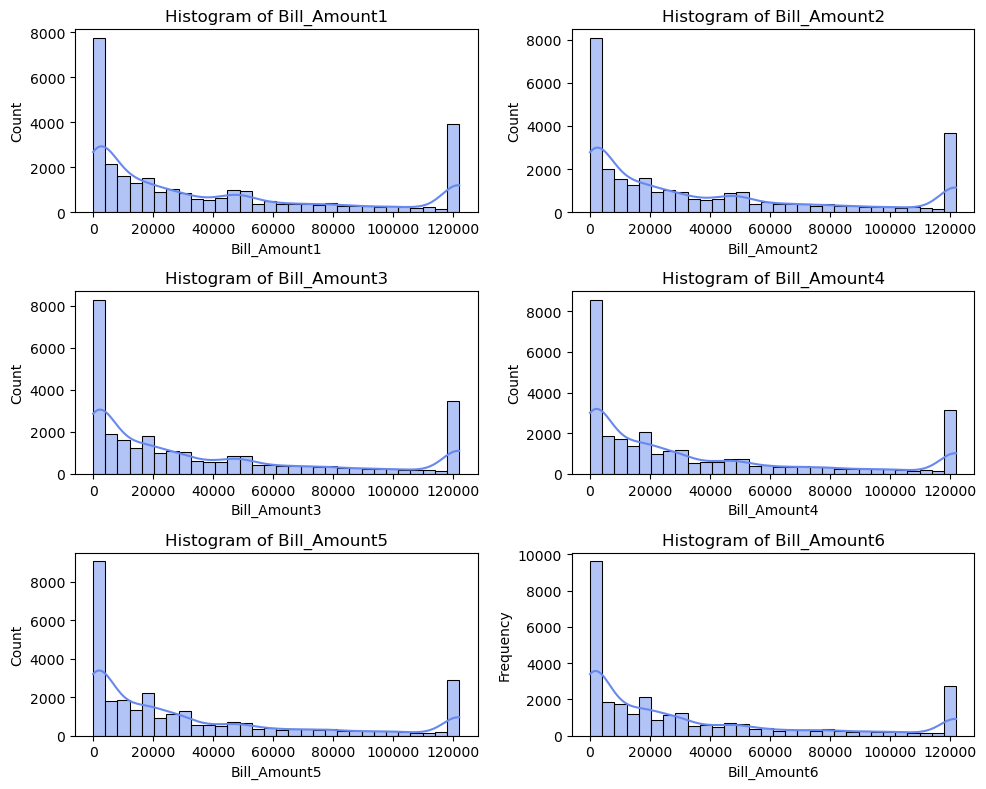

In [50]:
num_columns =['Bill_Amount1','Bill_Amount2','Bill_Amount3','Bill_Amount4','Bill_Amount5','Bill_Amount6']
fig, axs = plt.subplots(3, 2, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
sns.set_palette("coolwarm")
for i, column in enumerate(num_columns):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axs[row, col]
    ax.set_title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.histplot(data=df1[num_columns], x=column, bins=30, kde=True,ax=ax)
    i=i+1
plt.tight_layout()
plt.show()

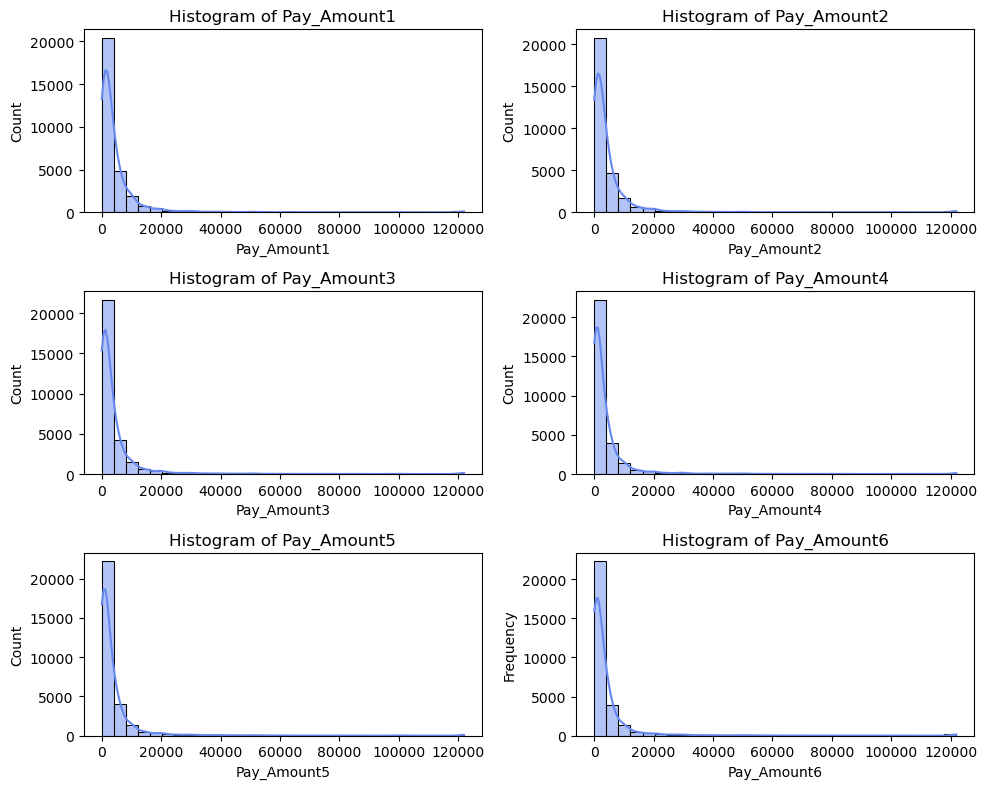

In [51]:
num_columns =['Pay_Amount1', 'Pay_Amount2','Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']
fig, axs = plt.subplots(3, 2, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
sns.set_palette("muted")
for i, column in enumerate(num_columns):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axs[row, col]
    ax.set_title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.histplot(data=df1[num_columns], x=column, bins=30, kde=True,ax=ax)
    i=i+1
plt.tight_layout()
plt.show()

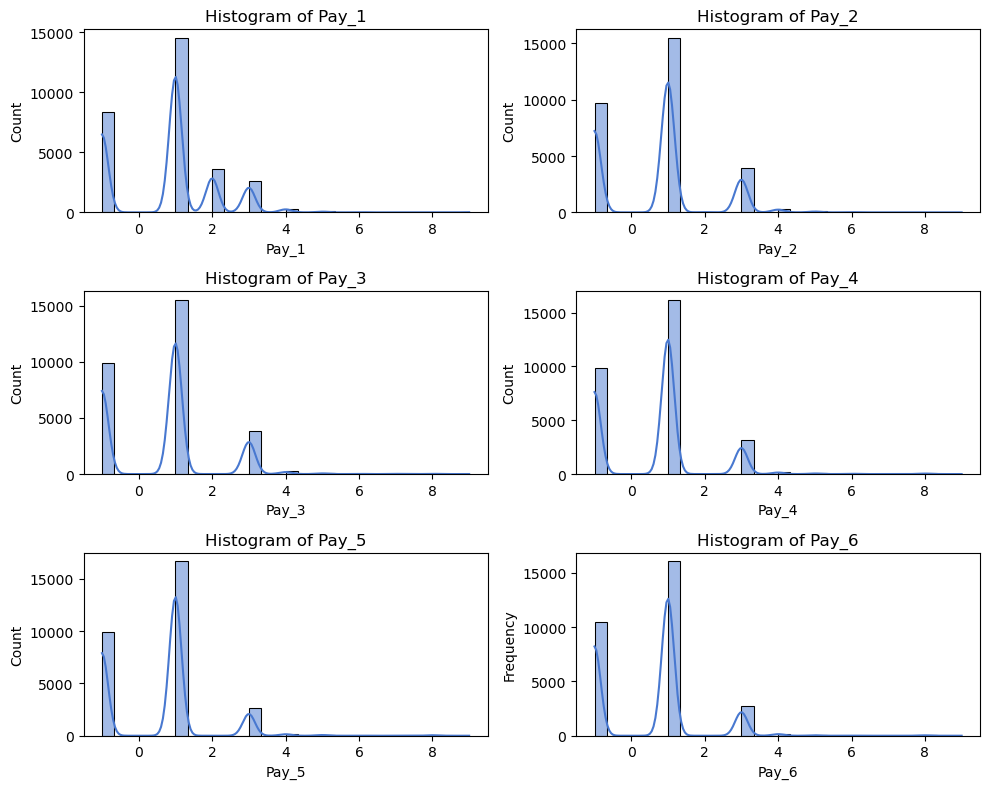

In [52]:
num_columns =['Pay_1', 'Pay_2','Pay_3', 'Pay_4','Pay_5', 'Pay_6']
custom_palette = ['#77DD36', '#FF7F51', '#FF9933', '#FFA07A', '#FFA500', '#FFD700']
fig, axs = plt.subplots(3, 2, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(num_columns):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axs[row, col]
    sns.set_palette(custom_palette)
    ax.set_title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.histplot(data=df1[num_columns], x=column, bins=30, kde=True,ax=ax)
    i=i+1
plt.tight_layout()
plt.show()

The above Histogram plots are not symmetrically distributed.

### Countplot

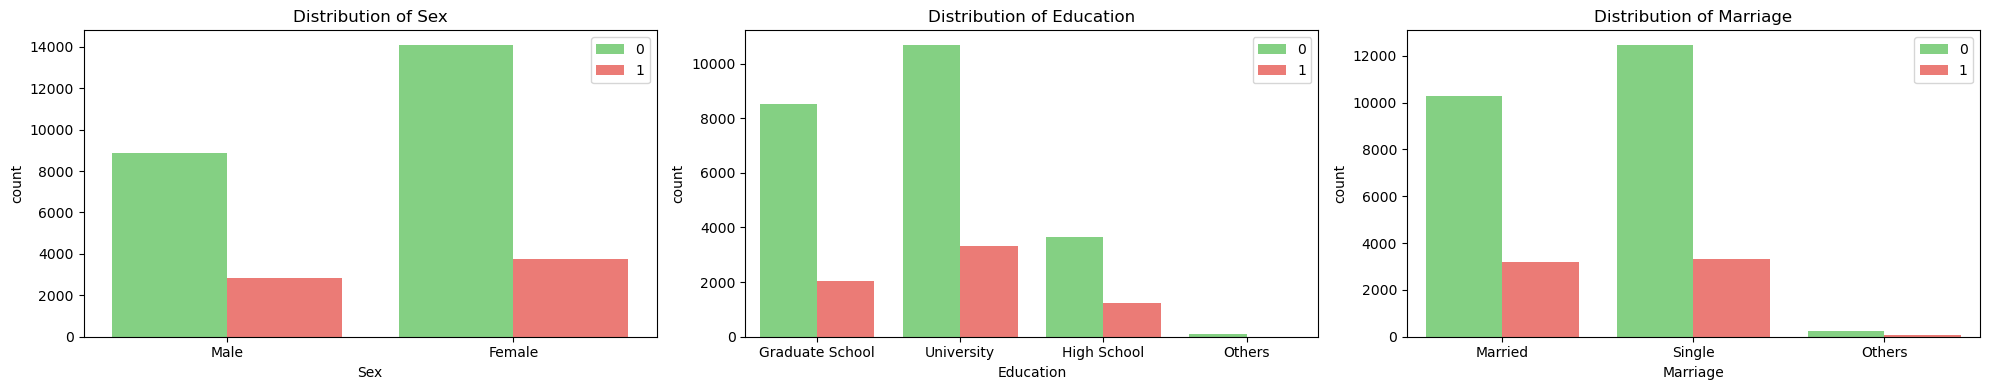

In [53]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('Distribution of Sex')
sns.countplot(x='Sex', data=df1, hue='Default_Payment_Next_Month', ax=axs[0])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].legend()

axs[1].set_title('Distribution of Education')
sns.countplot(x='Education', data=df1,hue='Default_Payment_Next_Month', ax=axs[1])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].legend()

axs[2].set_title('Distribution of Marriage')
sns.countplot(x='Marriage', data=df1,hue='Default_Payment_Next_Month', ax=axs[2])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].legend()

fig.tight_layout()
plt.show()

The bargraph1 that is drawn between Sex and count and we can observe that females have lower default probability compared to mean.

The bargraph2 demonstartes the count of the default payment of the categorie with the education variable. As the level of education increases, the probability of default payment decreases is the insight obtained from the graph.

The bargraph3 drawn between count and marital status of the person. The observation obtained from the graph is single people have lower default payment count than compared to married people. 

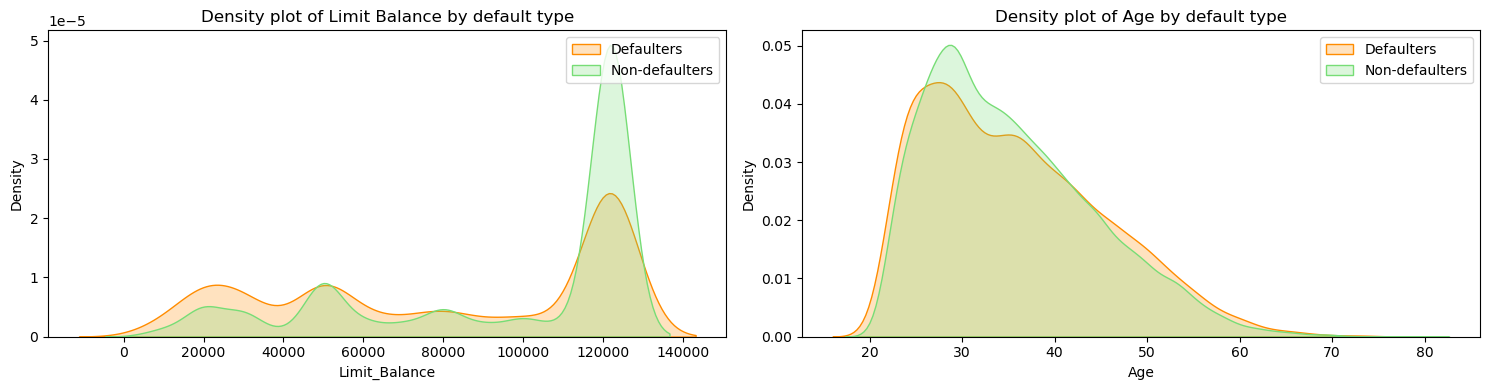

In [54]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

c0 = df1.loc[df1['Default_Payment_Next_Month'] == 0]['Limit_Balance']
c1 = df1.loc[df1['Default_Payment_Next_Month'] == 1]['Limit_Balance']
axs[0].set_title('Density plot of Limit Balance by default type')
sns.kdeplot(c1, fill=True, label='Defaulters', color='darkorange',ax=axs[0])
sns.kdeplot(c0, fill=True, label='Non-defaulters',ax=axs[0])
axs[0].legend()

c0 = df1.loc[df1['Default_Payment_Next_Month'] == 0]['Age']
c1 = df1.loc[df1['Default_Payment_Next_Month'] == 1]['Age']
axs[1].set_title('Density plot of Age by default type')
sns.kdeplot(c1, fill=True, label='Defaulters', color='darkorange',ax=axs[1])
sns.kdeplot(c0, fill=True, label='Non-defaulters',ax=axs[1])
axs[1].legend()

fig.tight_layout()
plt.show()

For the feature Limit_Balance, we drawn a density plot by default type, and the result is shown below on the left. It seems that when the given credit amount is approximately below 1,40,000 the probability of default is greater than that of non-default. This suggests that those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default. This observation makes sense as a higher credit limit is given to people with higher creditworthiness that have a lower likelihood to default.

For the feature Age also, we drawn a density plot as shown above on the right. The likelihood of non-default is higher for people between the ages of 25 and 40, suggesting that people in this age range are capable to repay credit card debt. 

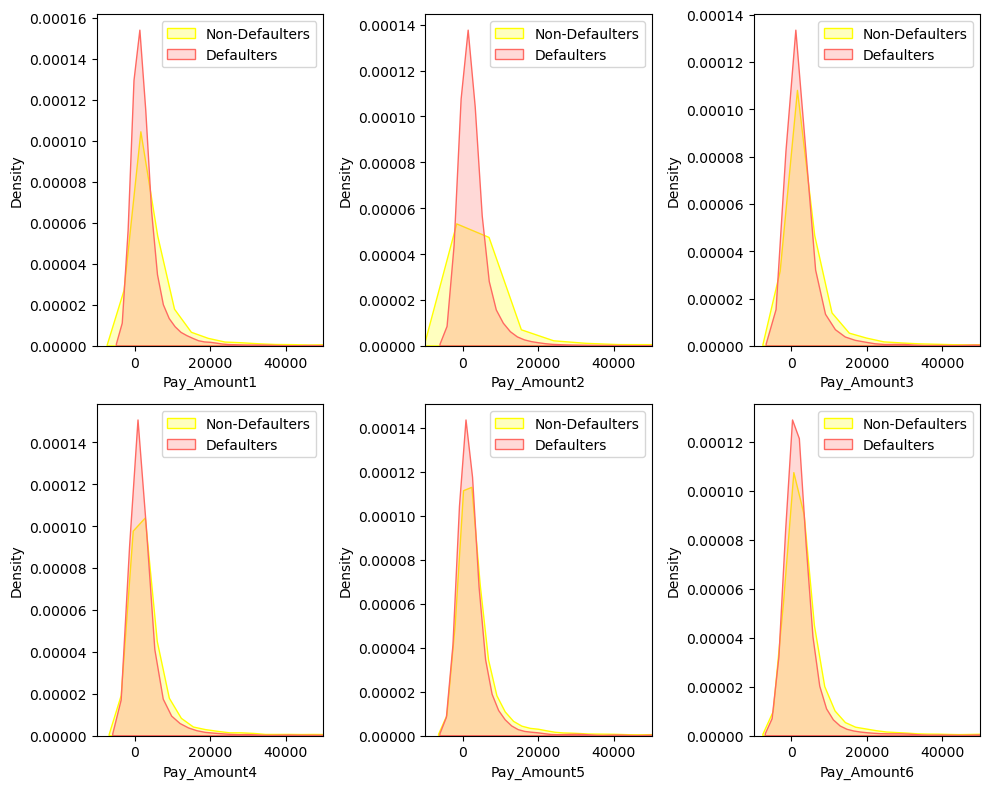

In [55]:
Pay_cols = ['Pay_Amount1', 'Pay_Amount2','Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']
plt.figure(figsize=(10,8))

for i,col in enumerate(Pay_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['Default_Payment_Next_Month'] == 0), col], label = 'Non-Defaulters', color='#FFFF00',fill=True)
    sns.kdeplot(df.loc[(df['Default_Payment_Next_Month'] == 1), col], label = 'Defaulters',  color='#FF6962',fill=True)
    plt.xlim(-10000,50000)
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

The above density plots shows probability of default is greater than non-default.

### Heatmap

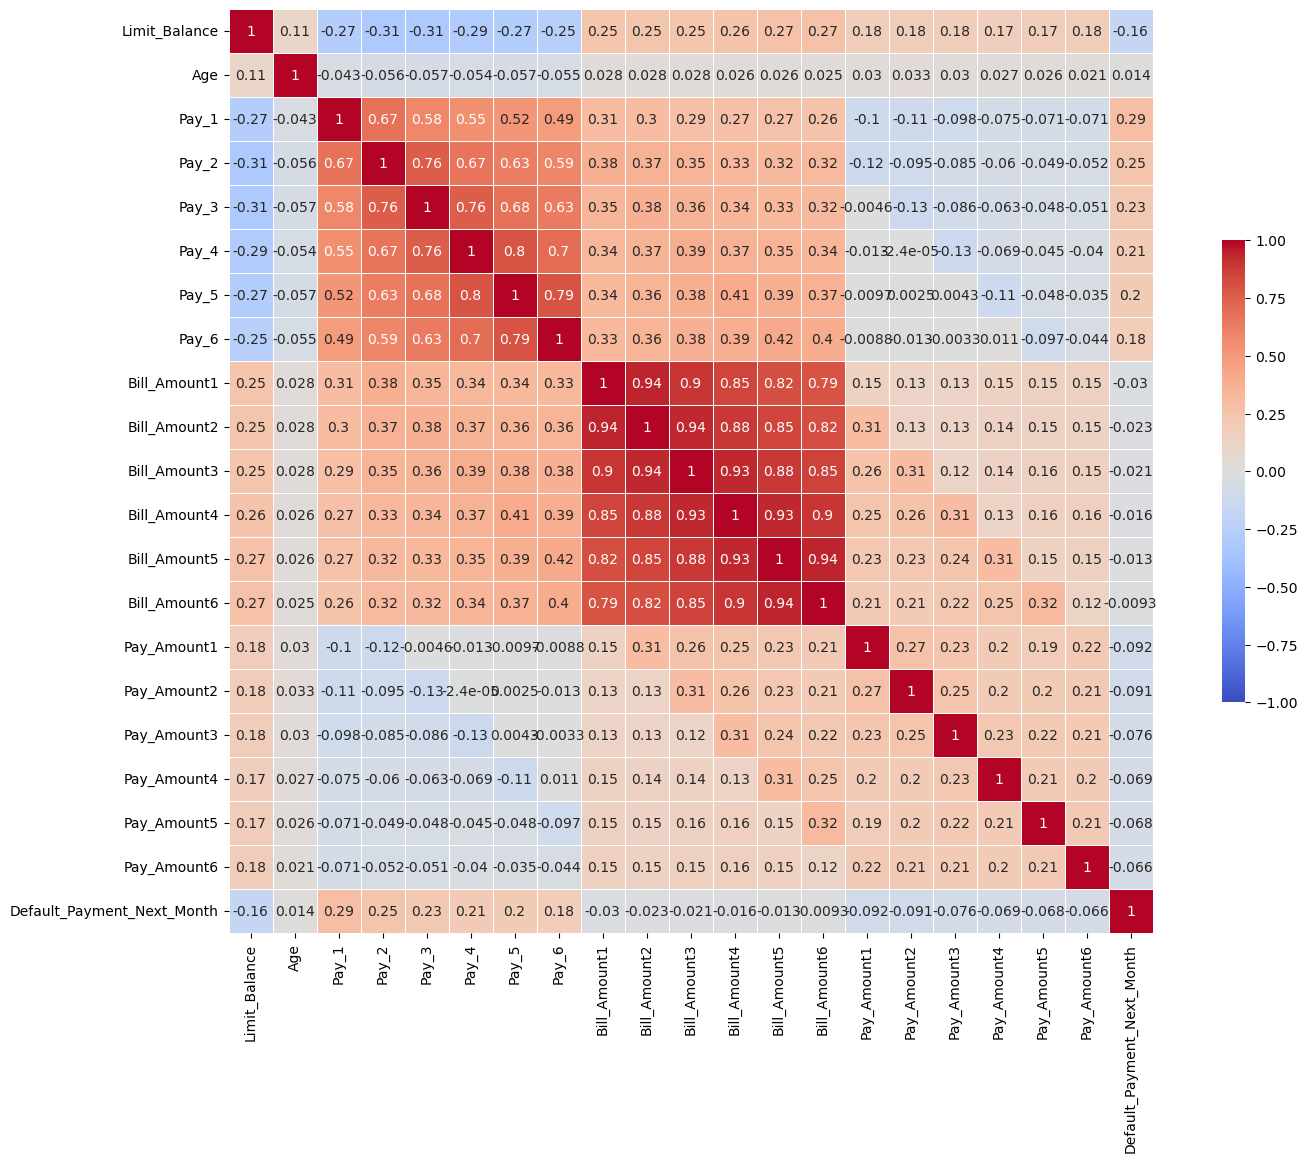

In [56]:
#Drawing heatmap
corr = df1[['Limit_Balance','Age','Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6','Bill_Amount1','Bill_Amount2','Bill_Amount3','Bill_Amount4','Bill_Amount5','Bill_Amount6','Pay_Amount1','Pay_Amount2','Pay_Amount3','Pay_Amount4','Pay_Amount5','Pay_Amount6', 'Default_Payment_Next_Month']].corr()

f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='coolwarm', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

From the heatmap we can observe that there is a significant positive connection between the BILL_AMTn characteristics, which might point to information redundancy. To address this issue we will draw pairplot if a linear trend is followed then BILL_AMTn encodes similar information i.e., redundancy.

### Pairplot

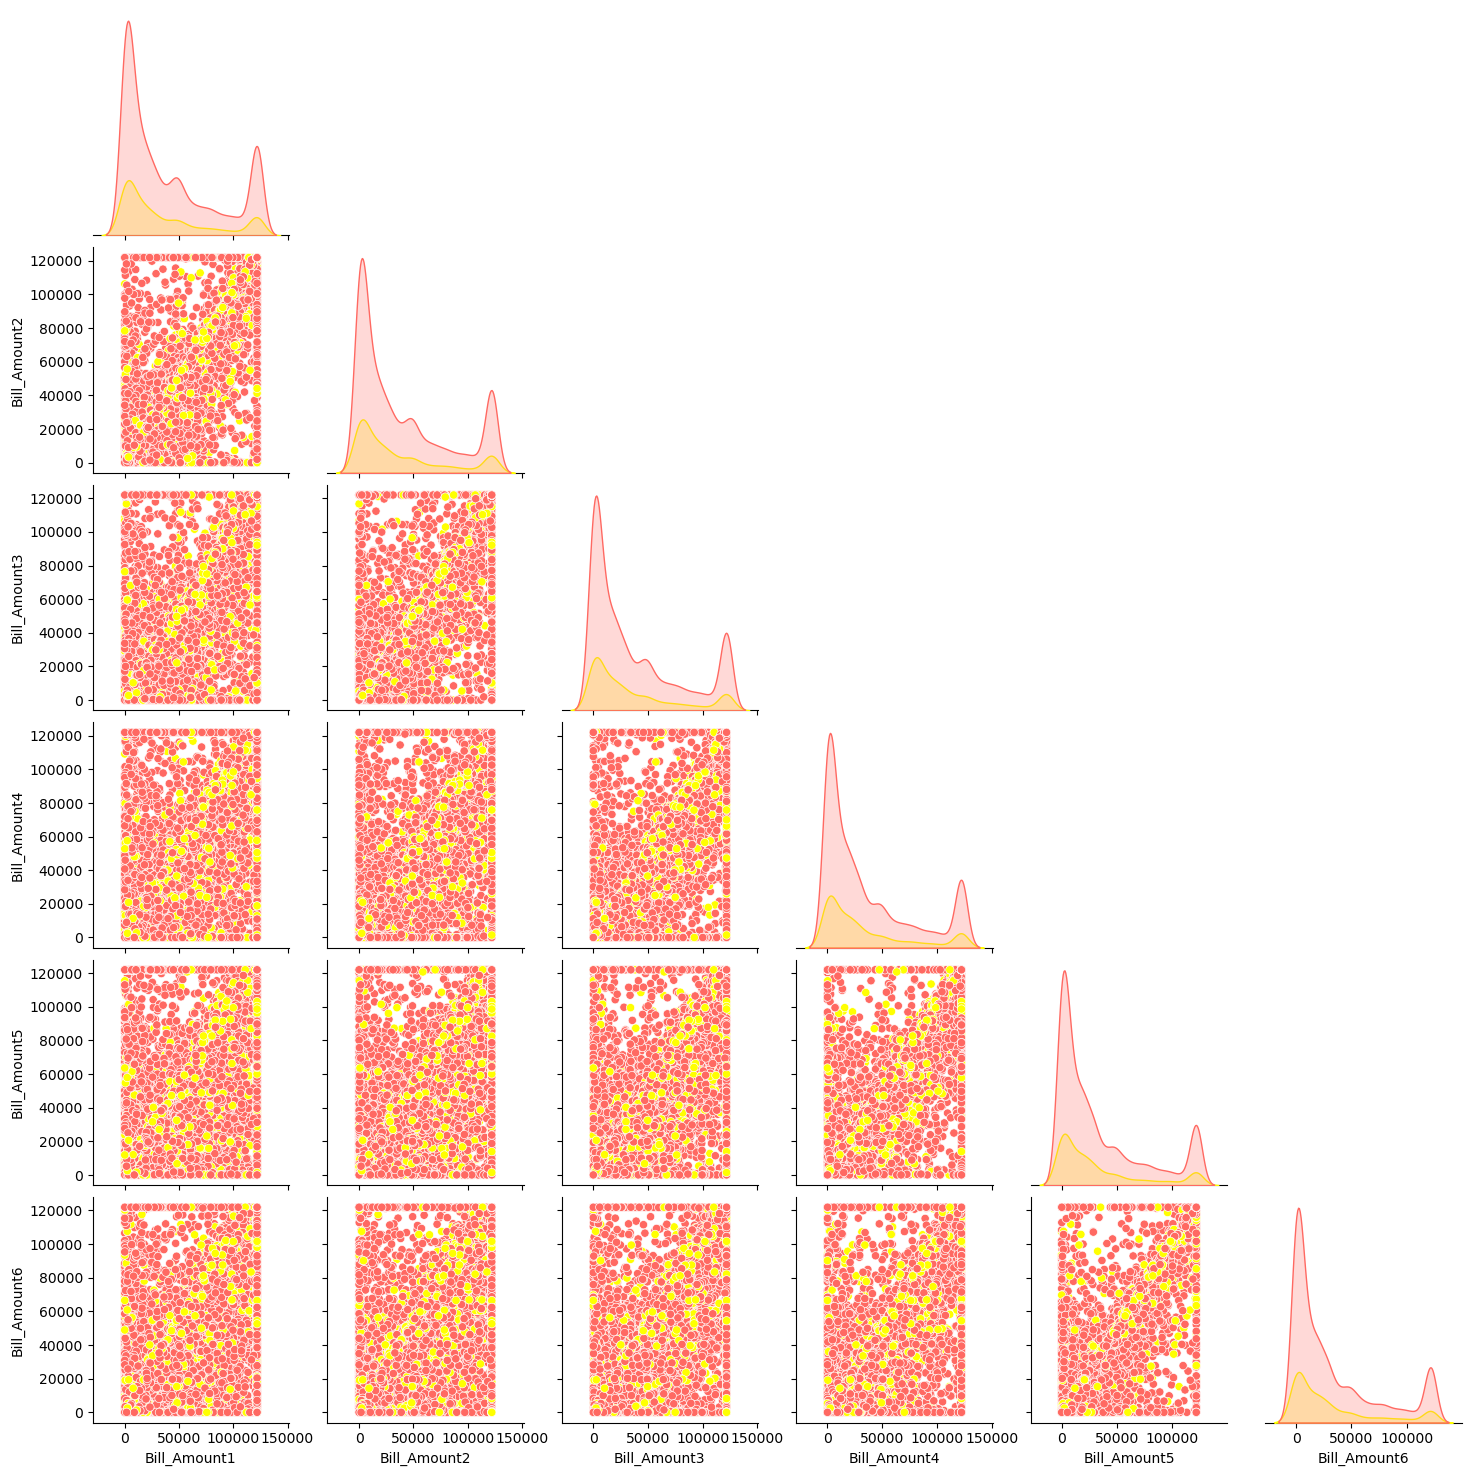

In [57]:
custom_palette = sns.color_palette(["#FF6962", "#FFFF00"])
pair_plot = sns.pairplot(df1[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Default_Payment_Next_Month']], hue='Default_Payment_Next_Month', diag_kind='kde', corner=True, palette=custom_palette)
pair_plot._legend.remove()

The above pairplot includes a small scatterplot that displays the distribution of data points among the two variables considered, separated by the two classes. The linear trend confirms that the Pearson coefficient , namely the BILL_AMTn features encode rather similar information.

### Barplot

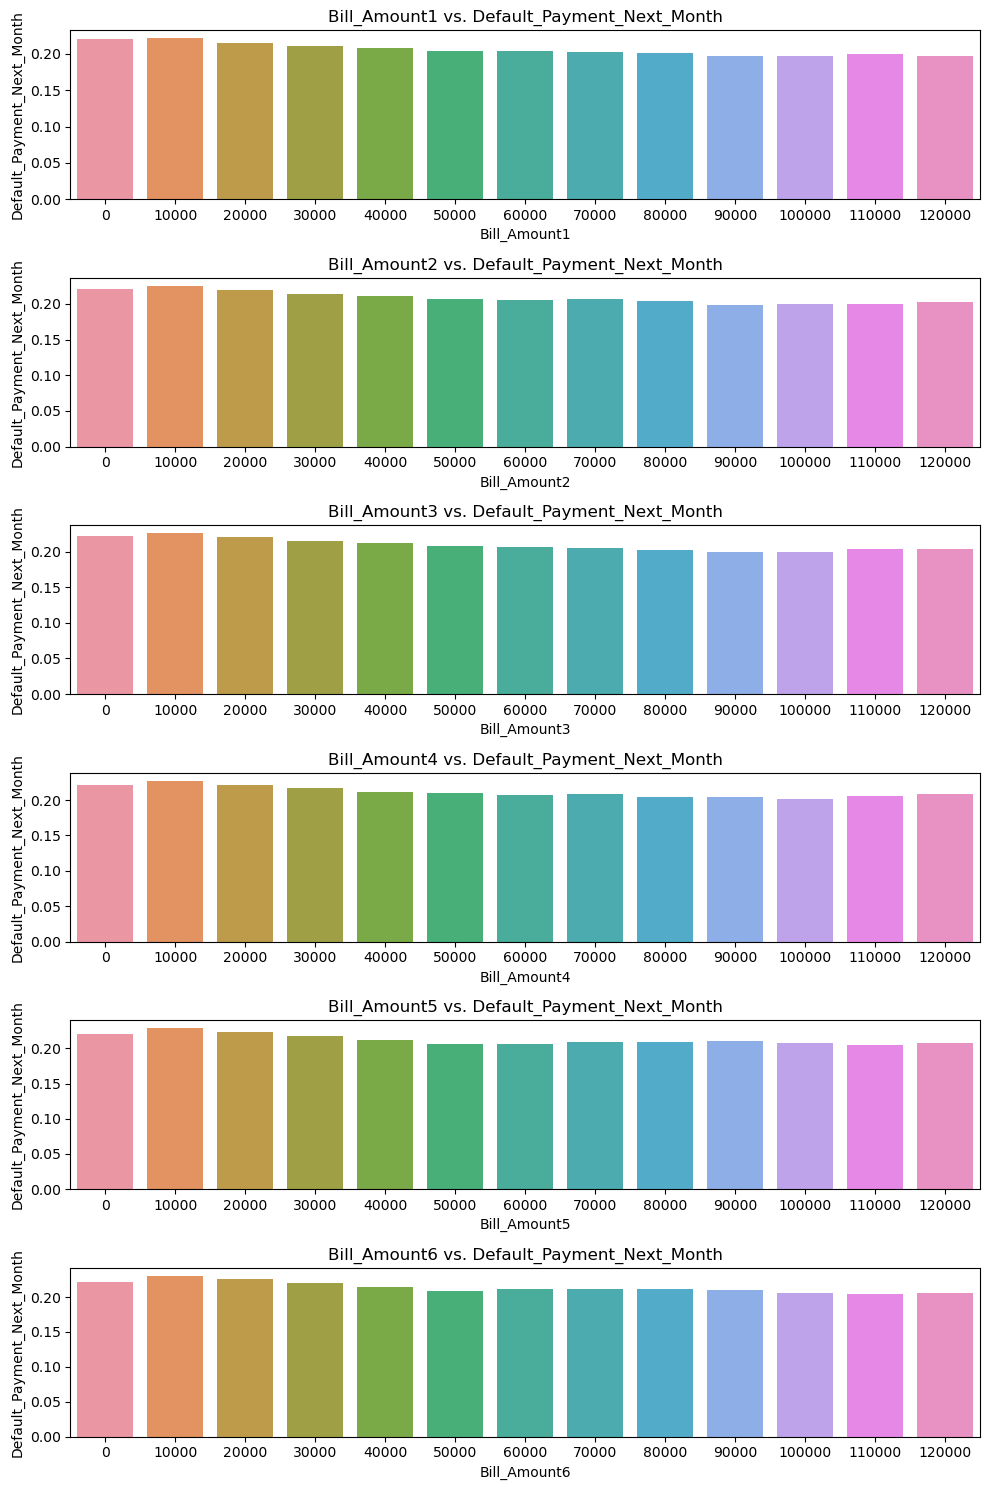

In [58]:
columns =['Bill_Amount1','Bill_Amount2','Bill_Amount3','Bill_Amount4','Bill_Amount5','Bill_Amount6']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(10, 15))

for col, ax in zip(columns, axs):
    val_r = range(0, int(df1[col].max()) + 1, 10000)
    pdf_data = [(value, round(df1[df1[col] > value]["Default_Payment_Next_Month"].mean(), 4)) for value in val_r]
    pdf_df = pd.DataFrame(pdf_data, columns=[col, 'Default_Payment_Next_Month'])
    sns.barplot(data=pdf_df, x=col, y='Default_Payment_Next_Month', ax=ax)
    ax.set_title(f'{col} vs. Default_Payment_Next_Month')


plt.tight_layout()
plt.show()

The above bargraph is drawn between Bill_Amounti (i=1 to 6) and the target variable i.e., Deault_Payment_Next_Month. On X-axis the variable Bill_Amounti is considered with a scale of 10000 from 0-120000 and from all the bargraphs we can observe that for all the values of Bill_Amounti the probabilty of making payment default is same i.e., >0.20.

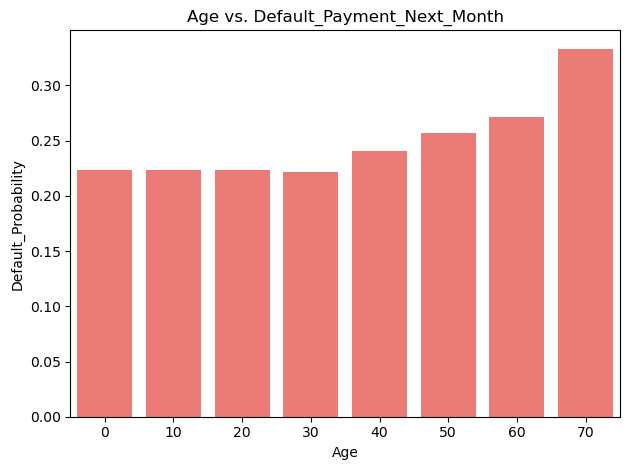

In [59]:
#Claim: Does the probability of default increase with increasing age?

val_r = range(0, int(df1['Age'].max()) + 1, 10)
pdf_data = [(value, round(df1[df1['Age'] > value]["Default_Payment_Next_Month"].mean(), 4)) for value in val_r]
pdf_df = pd.DataFrame(pdf_data, columns=['Age', 'Default_Payment_Next_Month'])
sns.barplot(data=pdf_df, x='Age', y='Default_Payment_Next_Month',color='#FF6962')
plt.ylabel("Default_Probability")
plt.title('Age vs. Default_Payment_Next_Month')
plt.tight_layout()
plt.show()

The above bargraph is drawn between the variable Age and default probabilty and from the graph we can observe that default probability is almost identical for each category of age, this may indicate that the Age variable may not be significant.

## Data Preprocessing

The quality of the data and the amount of useful information that are contained are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical to ensure that we examine and preprocess our dataset before we feed it to a learning algorithm.

 ### Feature Selection

In [60]:
X = df1[['Limit_Balance', 'Age','Sex', 'Marriage','Education',  'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']]
y = df1['Default_Payment_Next_Month']

In [61]:
#using wrapper method recursive feature elimination and the machine learning model used is logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [62]:
selected_feature_names = X.columns[rfe.support_]

In [63]:
selected_feature_names

Index(['Limit_Balance', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3',
       'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3',
       'Pay_Amount4', 'Pay_Amount5'],
      dtype='object')

The above features are the best features that are obtained from the recursive feature elimination method

### Handling Categorical Features

The categorical features “Education”,” Sex” and “Marriage” are already encoded with integer numbers. However, these are nominal features so one hot encoding allows us to remove the ordinal relationship, which would be meaningless between these categorical variables.  Binary values can then be used to indicate the particular class of an example.

In [64]:
#OneHotencoding for Categorical variables
df1= pd.get_dummies(df1, columns=['Sex','Marriage','Education'])


In [65]:
df1

Limit_Balance  Age  Pay_1  Pay_2  Pay_3  Pay_4  Pay_5  Pay_6  \
0              20000   24      3      3     -1     -1     -1     -1   
1             120000   26     -1      3      1      1      1      3   
2              90000   34      1      1      1      1      1      1   
3              50000   37      1      1      1      1      1      1   
4              50000   57     -1      1     -1      1      1      1   
...              ...  ...    ...    ...    ...    ...    ...    ...   
29560         121931   39      1      1      1      1      1      1   
29561         121931   43     -1     -1     -1     -1      1      1   
29562          30000   37      5      4      3     -1      1      1   
29563          80000   41      2     -1      1      1      1     -1   
29564          50000   46      1      1      1      1      1      1   

       Bill_Amount1  Bill_Amount2  ...  Default_Payment_Next_Month  Sex_1  \
0              3913          3102  ...                           1      0   
1              2682          1725  ...                           1      0   
2             29239         14027  ...                           0      0   
3             46990         48233  ...                           0      0   
4              8617          5670  ...                           0      1   
...             ...           ...  ...                         ...    ...   
29560        121931        121931  ...                           0      1   
29561          1683          1828  ...                           0      1   
29562          3565          3356  ...                           1      1   
29563            -1         78379  ...                           1      1   
29564         47929         48905  ...                           1      1   

       Sex_2  Marriage_1  Marriage_2  Marriage_3  Education_1  Education_2  \
0          1           1           0           0            0            1   
1          1           0           1           0            0            1   
2          1           0           1           0            0            1   
3          1           1           0           0            0            1   
4          0           1           0           0            0            1   
...      ...         ...         ...         ...          ...          ...   
29560      0           1           0           0            0            0   
29561      0           0           1           0            0            0   
29562      0           0           1           0            0            1   
29563      0           1           0           0            0            0   
29564      0           1           0           0            0            1   

       Education_3  Education_4  
0                0            0  
1                0            0  
2                0            0  
3                0            0  
4                0            0  
...            ...          ...  
29560            1            0  
29561            1            0  
29562            0            0  
29563            1            0  
29564            0            0  

[29565 rows x 30 columns]

In [66]:
df1.columns


Index(['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6',
       'Default_Payment_Next_Month', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4'],
      dtype='object')

In [67]:
X = df1[['Age','Limit_Balance', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']]
y = df1['Default_Payment_Next_Month']

### MinMaxScaler implementation

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_min = scaler.fit_transform(X)

Data Normalization is a method to change the values of numeric columns in a dataset to a common scale. While normalization also suppresses the effect of outliers. Hence Min-Max Scaling technique is used for normalization.

### Dimentionality Reduction

Many algorithms benefit from the reduction of the dimensionality of the data. The presence of many features leads to excessively complex models, which fit the parameters too closely with regard to the particular observations in the training set, but do not generalize well to new data. We say that these models have a high variance and are overfitting the training set. In this situation feature comes to handy. For the dataset, feature extraction is done using Principal Component Analysis (PCA) technique

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca=pca.fit_transform(X_min)

In [70]:
X_pca

array([[-0.64639251, -1.12262068, -0.13950235, ..., -0.28602932,
        -0.23052579, -0.09994336],
       [-0.60354433,  0.08413911, -0.64455393, ...,  0.42415207,
        -0.04897648,  0.06091199],
       [-0.37422817,  0.1027806 , -0.64232815, ...,  0.14668008,
         0.05819051, -0.03821726],
       ...,
       [-0.42970676,  0.57790396,  0.73344489, ...,  0.11122474,
         0.07530548, -0.1372242 ],
       [ 0.26404074, -0.39266997,  1.08278539, ..., -0.1787135 ,
         0.00840567,  0.42012318],
       [ 0.21355468, -0.57436729,  1.12336023, ..., -0.15466801,
         0.10062172,  0.04715992]])

In [71]:
df_pca = pd.DataFrame(X_pca)
df_pca

0         1         2         3         4         5         6  \
0     -0.646393 -1.122621 -0.139502 -0.475046 -0.101777  0.506294 -0.014443   
1     -0.603544  0.084139 -0.644554 -0.848520 -0.139834 -0.205124  0.017607   
2     -0.374228  0.102781 -0.642328 -0.860818 -0.065884 -0.053128 -0.027730   
3      0.145111 -1.048571 -0.206571 -0.367879 -0.117997  0.395802 -0.092039   
4     -0.197854 -0.637555  1.160742 -0.378567 -0.221002  0.172890  0.232514   
...         ...       ...       ...       ...       ...       ...       ...   
29560  1.079835 -0.300850  1.001156  0.583345  0.814080 -0.366177 -0.672178   
29561 -0.690949  0.696220  0.684358 -0.023824  0.869504 -0.753875  0.086719   
29562 -0.429707  0.577904  0.733445 -1.014040  0.050872  0.393130  0.182973   
29563  0.264041 -0.392670  1.082785  0.488121  0.847869 -0.210953  0.093034   
29564  0.213555 -0.574367  1.123360 -0.384222 -0.177818  0.299870 -0.118758   

              7         8         9  
0     -0.286029 -0.230526 -0.099943  
1      0.424152 -0.048976  0.060912  
2      0.146680  0.058191 -0.038217  
3     -0.157288 -0.009993  0.009276  
4     -0.202366  0.293100  0.175852  
...         ...       ...       ...  
29560 -0.056400 -0.053869  0.362887  
29561  0.130537  0.073959  0.063112  
29562  0.111225  0.075305 -0.137224  
29563 -0.178713  0.008406  0.420123  
29564 -0.154668  0.100622  0.047160  

[29565 rows x 10 columns]

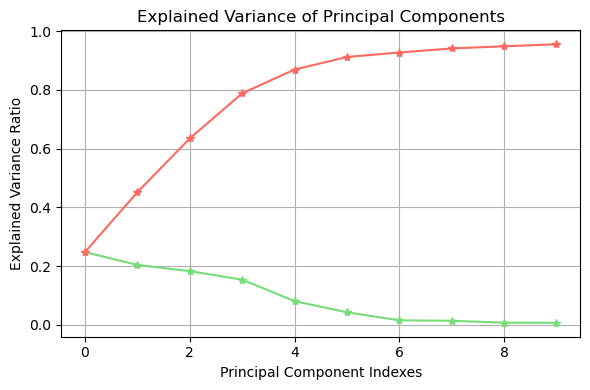

In [72]:
plt.figure(figsize = (6,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='*')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='*')
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

Since we want to reduce the dimensionality of our dataset by compressing it into a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). The eigenvalues define the magnitude of the eigenvectors, to select the n (n=10 considered) most informative eigenvectors, the above plot describes the variance explained ratios of the eigenvalues.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [74]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [75]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)


### Dealing with the imbalanced data

 The dataset we are dealing is unbalanced, as the non-defaulter examples are over-represented. To handle imbalanced data there are techniques like resampling and cost-sensitive learning. For this dataset we used the cost sensitive learning technique i.e., Synthetic Minority Oversampling Technique (SMOTE).

In [76]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=24)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [77]:
y_sm = pd.DataFrame(y_smote)
y_sm.value_counts()

Default_Payment_Next_Month
0                             18381
1                             18381
dtype: int64

## Conclusion

We conducted our study on the Default of credit card clients dataset. After cleaning the data, we investigated the dataset by using exploratory data analysis techniques. Furthermore, we applied data normalization and feature selection and extraction techniques to the dataset. Additionally the datset is imbalanced and it is handled using SMOTE technique because the main problem with imbalanced datasets is that most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. Thus, they tend to focus on
the majority class and ignore the minority class. They might only predict the majority class, and hence have a high accuracy rate, but this isn't useful because the minority class, which is usually the point of interest, is completely ignored. Now the data is ready to fed to the machine learning algorithm.

